# **Facebook Ad Campaign Analysis and Prediction**
 - Anushka Sawant  


In [ ]:
import numpy as np 
import pandas as pd
#Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode
#Optimization model
import optuna
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import mean_squared_error
# Prediction model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset = pd.read_csv('KAG_conversion_data.csv')
dataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# **Data Cleaning**

In [ ]:
print("Shape of the dataset before cleaning:\n", dataset.shape)

Shape of the dataset before cleaning:
 (1143, 11)


In [ ]:
 # Removing Irrelevent Values and columns
dataset.dropna(inplace=True)
dataset.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [ ]:
print("Shape of dataset after cleaning: \n", dataset.shape)
print("Information of dataset\n",dataset.info)

Shape of dataset after cleaning: 
 (1143, 11)
Information of dataset
 <bound method DataFrame.info of         ad_id  xyz_campaign_id  ...  Total_Conversion Approved_Conversion
0      708746              916  ...                 2                   1
1      708749              916  ...                 2                   0
2      708771              916  ...                 1                   0
3      708815              916  ...                 1                   0
4      708818              916  ...                 1                   1
...       ...              ...  ...               ...                 ...
1138  1314410             1178  ...                13                   2
1139  1314411             1178  ...                 3                   0
1140  1314412             1178  ...                 2                   0
1141  1314414             1178  ...                 8                   2
1142  1314415             1178  ...                 5                   2

[1143 row

In [ ]:
dataset["xyz_campaign_id"].replace({916:"Campaign_916",936:"Campaign_936",1178:"Campaign_1178"}, inplace=True)
dataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,Campaign_916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,Campaign_916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,Campaign_916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,Campaign_916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,Campaign_916,103928,30-34,M,28,4133,1,1.29,1,1


##**FEATURE DESCRIPTION :**


*   This dataset contains 1143 rows of data with 11 attributes.
*   Ad_id is the id of specific ad set. It is an numerical feature.
*   Xyz_campaign_id: an ID associated with each ad campaign of XYZ company. There are 3 prime campaigns, namely 916,936 and 1178.
*   Campaign_id is the id assigned by the ad running company.
*   Fb_campaign_id is the id assigned by facebook for every ad set. There are 1143 FB Campaigns.
*   Age and gender talk about the demographics. Both are categorical features.
*   Interest is the user interests and likes of facebook users who were taregted for the ad.
*   Impressiosn are the number of times the ad was shown to the users.
*   Clicks is the number of time users clicked on the ad spent is the amount of money spent on each campaign.
*   Total_Conversions is the number of users who have clicked the ad and have made a purchase or installed an app.
*   Approved_Conversions tells how many became actual active users.

In [ ]:
dataset.describe()

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
dataset.interest.value_counts()

16     140
10      85
29      77
27      60
15      51
28      51
20      49
64      48
63      46
18      43
26      41
21      36
32      33
22      33
19      32
25      26
30      25
31      25
2       25
24      24
7       24
23      23
36      21
65      19
66      11
107      8
110      8
102      7
112      7
105      7
101      7
108      7
100      6
111      6
113      6
109      6
106      5
104      5
103      5
114      5
Name: interest, dtype: int64

# **Analysis**

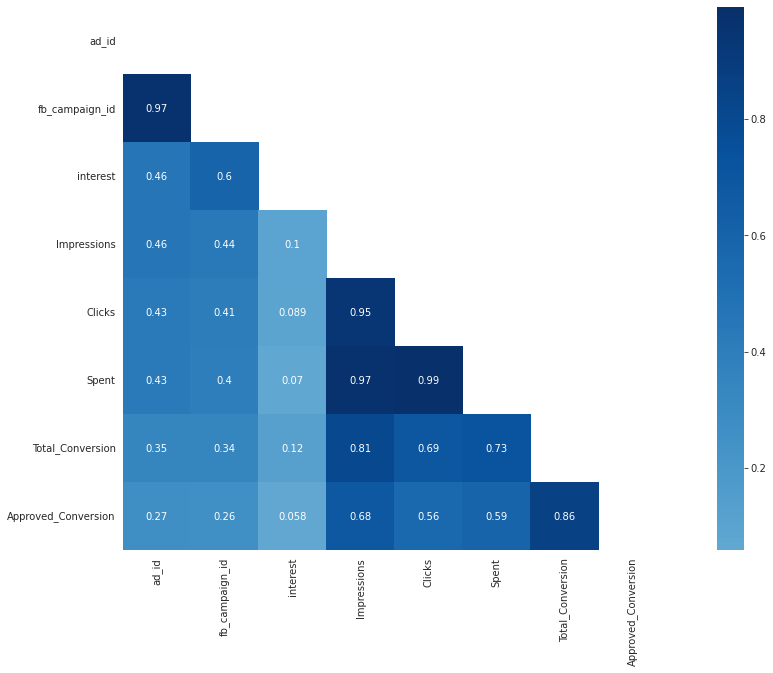

In [ ]:
corr = dataset.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='Blues', center=0, square=True)

In [ ]:
print('Total ADS: {}'.format(dataset.shape[0]))

print('Number of ADS with 0 clicks: {}'.format(len(dataset.loc[dataset['Clicks'] == 0])))
print('Number of 0 paids to FACEBOOK for showing ADS: {}'.format(len(dataset.loc[dataset['Spent'] == 0])))
print('Number of ADS with 0 enquires about their product: {}'.format(len(dataset.loc[dataset['Total_Conversion'] == 0])))
print('Number of ADS with 0 buys: {}'.format(len(dataset.loc[dataset['Approved_Conversion'] == 0])))

## Age Gender Demographics

In [ ]:
dataset.age.value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [ ]:
 #Age-wise distribution
 age=dataset['age'].value_counts()
 px.bar(dataset, x=age.index, y=age,title='Age-wise distribution')

In [ ]:
dataset.gender.value_counts()

M    592
F    551
Name: gender, dtype: int64

In [ ]:
#Gender-wise distribution
gender=dataset['gender'].value_counts()
px.bar(dataset, x=gender.index, y=gender,title='Gender-wise distribution')

In [ ]:
px.bar(dataset, x='age', color='gender', color_discrete_sequence=px.colors.sequential.Blues_r,barmode='group')

## Clicks

In [ ]:
# Count of Clicks
clicks=dataset['Clicks'].value_counts()
px.bar(dataset, x=clicks.index, y=clicks,title='Count of Clicks',color_discrete_sequence=px.colors.sequential.Blues_r)

In [ ]:
#Campaign wise distribution of Clicks
px.funnel(dataset, x='Clicks',y='xyz_campaign_id',title='Count of Clicks per Campaign',color_discrete_sequence=px.colors.sequential.Blues_r)

In [ ]:
# Gender-wise distribution of clicks
px.pie(dataset,names='gender', values='Clicks', title='Gender Vs Clicks',color_discrete_sequence=px.colors.sequential.Blues_r,hole=.3)

In [ ]:
# Gender-wise distribution of clicks
px.pie(dataset,names='age', values='Clicks', title='Age Vs Clicks',color_discrete_sequence=px.colors.sequential.Blues_r,hole=.3)

## Campaign

In [ ]:
xyz_campaign_id=dataset['xyz_campaign_id'].value_counts()
px.bar(dataset, x=xyz_campaign_id.index, y=xyz_campaign_id,title='Count of Campaigns')

## Interest

In [ ]:
# Count of interest
interest=dataset['interest'].value_counts()
px.bar(dataset, x=interest.index, y=interest,title='Count of Interests')

In [ ]:
# Age-wise distribution of interest
px.pie(dataset,names='age', values='interest', title='Age Vs Interest',color_discrete_sequence=px.colors.sequential.Blues_r,hole=.3)

In [ ]:
# Gender-wise distribution of interest
px.pie(dataset,names='gender', values='interest', title='Gender Vs Interest',color_discrete_sequence=px.colors.sequential.Blues_r,hole=.3)

In [ ]:
# Campaign-wise distribution of interest
px.violin(dataset, x='xyz_campaign_id',y='interest',title='Count of interest per Campaign',color_discrete_sequence=px.colors.sequential.Blues_r)

## Impressions and Spendings

In [ ]:
#Distribution of Impressions With Respect To Age
px.pie(dataset,names='age', values='Impressions',title='Age Vs Impressions', color_discrete_sequence=px.colors.sequential.Blues_r)

In [ ]:
#Distribution of Impressions With Respect To Gender
px.pie(dataset,names='gender', values='Impressions',title='Gender Vs Impressions',color_discrete_sequence=px.colors.sequential.Blues_r,hole=.3)

In [ ]:
#Distribution of  Spendings With Respect To Age
px.pie(dataset,names='age', values='Spent', title='Age Vs Spendings',color_discrete_sequence=px.colors.sequential.Blues_r)

In [ ]:
#Distribution of Spendings With Respect To Gender
px.pie(dataset,names='gender', values='Spent', title='Gender Vs Spendings',color_discrete_sequence=px.colors.sequential.Blues_r,hole=.3)

In [ ]:
def sum_mean(data,col1,col2=[]):
    sum_df, mean_df = [] ,[]
    for i in data[col1].unique():
        d = data[data[col1] == i]
        s, m = [i], [i]
        if len(col2) == 0:
            col2 = [x for x in data.columns if x != col1]
        for j in col2:
            s.append(d[j].sum())
            m.append(d[j].sum())
        sum_df.append(s)
        mean_df.append(m)
    return sum_df,mean_df

In [ ]:
sum_df,_ = sum_mean(dataset,'gender',['Impressions','Spent'])
dt2 = pd.DataFrame(sum_df)
dt2.columns =['gender','Impressions','Spent']
dt2["gender"].replace({0:"F",1:"M"}, inplace=True)

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=dt2['gender'], y=dt2['Impressions']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=dt2['gender'], y=dt2['Spent'],marker=dict(color = 'rgb(1,73,218)')),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text='Impressions and Spendings in Gender')
fig.update_yaxes(title_text="Impressions",row=1, col=1)
fig.update_yaxes(title_text="Spent",row=1, col=2)
fig.update_xaxes(title_text="Gender")
fig.show()

In [ ]:
sum_df,_ = sum_mean(dataset,'age',['Impressions','Spent'])
dt2 = pd.DataFrame(sum_df)
dt2.columns =['age','Impressions','Spent']

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=dt2['age'], y=dt2['Impressions']),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=dt2['age'], y=dt2['Spent'],marker=dict(color = 'rgb(1,73,218)')),
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text='Impressions and Spent in Age')
fig.update_yaxes(title_text="Impressions",row=1, col=1)
fig.update_yaxes(title_text="Spent",row=1, col=2)
fig.update_xaxes(title_text="Age")
fig.show()

In [ ]:
categories = ['ad_id', 'fb_campaign_id','age', 'gender', 'xyz_campaign_id', 'interest']
dataset[categories] = dataset[categories].astype('category')

In [ ]:
# Cost analysis with respect to Age, Spendings and Conversions
print('Cost analysis')
print('Campaign wise clicks')
print((dataset.groupby(['xyz_campaign_id'])).Clicks.sum())
print('-------------------------')

print('Campaign wise amount spent')
print((dataset.groupby(['xyz_campaign_id'])).Spent.sum())
print('--------------------------')

print('Campaign wise total conversions')
print((dataset.groupby(['xyz_campaign_id'])).Total_Conversion.sum())
print('---------------------------')

Cost analysis
Campaign wise clicks
xyz_campaign_id
916       113
936      1984
1178    36068
Name: Clicks, dtype: int64
-------------------------
Campaign wise amount spent
xyz_campaign_id
916       149.710001
936      2893.369999
1178    55662.149959
Name: Spent, dtype: float64
--------------------------
Campaign wise total conversions
xyz_campaign_id
916       58
936      537
1178    2669
Name: Total_Conversion, dtype: int64
---------------------------


In [ ]:
# Detailed analysis of campaign
campaign_1178_clicks = 36068
campaign_1178_cost = 55662.149959
campaign_1178_conv = 2669
campaign_1178_adcount = 625
campaign_1178_cpc = (campaign_1178_cost/campaign_1178_clicks)
campaign_1178_cpco = (campaign_1178_cost/campaign_1178_conv)
campaign_1178_cpad = (campaign_1178_cost/campaign_1178_adcount)

print('The cost per click of campaign_1178 is '+ str(campaign_1178_cpc))
print('The cost per conversion of campaign_1178 is '+ str(campaign_1178_cpco))
print('The cost per ad in campaign_1178 is '+ str(campaign_1178_cpad))
print('---------------------------------------------------------------')


campaign_936_clicks = 1984
campaign_936_cost = 2893.369999
campaign_936_conv = 537
campaign_936_adcount = 464
campaign_936_cpc = (campaign_936_cost/campaign_936_clicks)
campaign_936_cpco = (campaign_936_cost/campaign_936_conv)
campaign_936_cpad = (campaign_936_cost/campaign_936_adcount)

print('The cost per click of campaign_936 is '+ str(campaign_936_cpc))
print('The cost per conversion of campaign_936 is '+ str(campaign_936_cpco))
print('The cost per ad in campaign_936 is '+ str(campaign_936_cpad))
print('---------------------------------------------------------------')

campaign_916_clicks = 113
campaign_916_cost = 149.710001
campaign_916_conv = 58
campaign_916_adcount = 54
campaign_916_cpc = (campaign_916_cost/campaign_916_clicks)
campaign_916_cpco = (campaign_916_cost/campaign_916_conv)
campaign_916_cpad = (campaign_916_cost/campaign_916_adcount)

print('The cost per click of campaign_916 is '+ str(campaign_916_cpc))
print('The cost per conversion of campaign_916 is '+ str(campaign_916_cpco))
print('The cost per ad in campaign_916 is '+ str(campaign_916_cpad))
print('---------------------------------------------------------------')

The cost per click of campaign_1178 is 1.5432557934734392
The cost per conversion of campaign_1178 is 20.85505805882353
The cost per ad in campaign_1178 is 89.0594399344
---------------------------------------------------------------
The cost per click of campaign_936 is 1.4583518140120968
The cost per conversion of campaign_936 is 5.388026068901303
The cost per ad in campaign_936 is 6.23571120474138
---------------------------------------------------------------
The cost per click of campaign_916 is 1.3248672654867257
The cost per conversion of campaign_916 is 2.5812069137931037
The cost per ad in campaign_916 is 2.772407425925926
---------------------------------------------------------------


*   From the above analysis it is very clear that campaign 916 is the most efficient and profitable campaign.
*   The cpc and cost per conversion is very low compared other campaigns.
*   If we scale up the campaign 916 to the budget of campaign 1178 we might drive 5 times more results of campaign 1178.

##Conversion Analysis

In [ ]:
# Conversion with respect to age
print((dataset.groupby(['age'])).Total_Conversion.sum())
print((dataset.groupby(['age'])).ad_id.count())
print((dataset.groupby(['age'])).Total_Conversion.sum())
print((dataset.groupby(['age'])).ad_id.count())
print((dataset.groupby(['age'])).Total_Conversion.sum())
print((dataset.groupby(['age'])).ad_id.count())

age
30-34    1431
35-39     626
40-44     523
45-49     684
Name: Total_Conversion, dtype: int64
age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64
age
30-34    1431
35-39     626
40-44     523
45-49     684
Name: Total_Conversion, dtype: int64
age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64
age
30-34    1431
35-39     626
40-44     523
45-49     684
Name: Total_Conversion, dtype: int64
age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64


In [ ]:
# Count of Approved Conversions
approved_conversion=dataset['Approved_Conversion'].value_counts()
px.bar(dataset, x=approved_conversion.index, y=approved_conversion,title='Count of Approved Conversions')

In [ ]:
# Conversion with respect to gender
print('Gender based analysis')
print((dataset.groupby(['gender'])).Total_Conversion.sum())
print((dataset.groupby(['gender'])).ad_id.count())

Gender based analysis
gender
F    1644
M    1620
Name: Total_Conversion, dtype: int64
gender
F    551
M    592
Name: ad_id, dtype: int64


In [ ]:
# Conversion with respect to age
print((dataset.groupby(['age'])).Total_Conversion.sum())
print((dataset.groupby(['age'])).ad_id.count())

age
30-34    1431
35-39     626
40-44     523
45-49     684
Name: Total_Conversion, dtype: int64
age
30-34    426
35-39    248
40-44    210
45-49    259
Name: ad_id, dtype: int64


*   Though we can get more conversion by targeting Males alone, the cost per conversion is high (inferred from campaign 1178 analysis) and the number of ads.
*   If there was to be more ads in campaign 916 the conversions would have been much higher
*   From the gender analysis we can conclude that we need to target both male and female.
*   From the age analysis , we can conclude that we need to target the age group of 30-34 and 45-49.

In [ ]:
# Approved Conversion for each campaign.
fig=px.bar(dataset,x=dataset["Approved_Conversion"],y=dataset["xyz_campaign_id"],orientation='h',color_discrete_sequence=px.colors.sequential.Blues_r)
fig.show()

In [ ]:
# Approved Conversion for each campaign with respect to age.
px.bar(dataset,x=dataset["xyz_campaign_id"], y=dataset["Approved_Conversion"], color=dataset["age"],color_discrete_sequence=px.colors.sequential.Blues_r, barmode='group')

*   Though we can get more conversion by targeting 30-34 and 35-39 alone, the cost per conversion is high (inferred from campaign 1178 analysis).

*   The number of ads are also different. If there was to be more ads in campaign 916 the conversions would have been much higher.
*   From the above analysis we can conclude that we need to target all four age groups.

#**Prediction**

In [ ]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

In [ ]:
x['age'] = pd.np.where(x.age.str.contains("30-34"), 32,
                   pd.np.where(x.age.str.contains("35-39"), 37,
                   pd.np.where(x.age.str.contains("40-44"), 42, 47)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
x['gender'] = lb.fit_transform(x['gender'])

x.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion
0,708746,916,103916,32,1,15,7350,1,1.43,2
1,708749,916,103917,32,1,16,17861,2,1.82,2
2,708771,916,103920,32,1,20,693,0,0.00,1
3,708815,916,103928,32,1,28,4259,1,1.25,1
4,708818,916,103928,32,1,28,4133,1,1.29,1


In [ ]:
x.clicks=x.Clicks.astype(int)
x.age=x.age.astype(int)
x.impressions=x.Impressions.astype(int)
x.spent=x.Spent.astype(int)
x.interest=x.interest.astype(int)
x.campaign_id=x.xyz_campaign_id.astype('category')
x.total_conversion=x.Total_Conversion.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
y = y.reshape(len(y),1)

print(y)

[[1]
 [0]
 [0]
 ...
 [0]
 [2]
 [2]]


In [ ]:
#Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

y

array([[ 0.03223643],
       [-0.54348614],
       [-0.54348614],
       ...,
       [-0.54348614],
       [ 0.60795901],
       [ 0.60795901]])

In [ ]:
#Splitting the Dataset to Train and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train)

[[-1.43482076 -1.24516442 -1.45519967 ... -0.58715742 -0.59123316
  -0.41405523]
 [ 0.6927456   0.90986308  0.5289069  ...  0.73169676  0.97143967
   0.0322108 ]
 [ 0.69133772  0.90986308  0.52666205 ... -0.42889492 -0.42282135
  -0.19092221]
 ...
 [ 1.68709377  0.90986308  2.25387959 ...  1.29440788  1.22814395
   1.59414191]
 [ 0.69390079  0.90986308  0.53071254 ...  6.8160107   6.4571983
   7.84186635]
 [ 1.68706799  0.90986308  2.25363558 ...  0.87237454  0.80049531
  -0.41405523]]


Multiple Linear Regression


In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-3.01e-01  3.22e-02]
 [-3.06e-01  3.22e-02]
 [ 5.17e-02 -5.43e-01]
 [-2.90e-01  3.22e-02]
 [-3.81e-01 -5.43e-01]
 [ 3.77e-03 -5.43e-01]
 [-2.84e-01  3.22e-02]
 [-2.96e-01 -5.43e-01]
 [-2.78e-01 -5.43e-01]
 [-3.93e-01 -5.43e-01]
 [-9.21e-02 -5.43e-01]
 [ 1.13e+00  1.76e+00]
 [ 4.42e-01 -5.43e-01]
 [-8.49e-02 -5.43e-01]
 [-2.99e-01  3.22e-02]
 [-3.35e-01 -5.43e-01]
 [-2.72e-01 -5.43e-01]
 [-8.18e-02  6.08e-01]
 [-3.40e-01 -5.43e-01]
 [-2.74e-01 -5.43e-01]
 [ 4.45e+00  2.34e+00]
 [ 1.05e-01 -5.43e-01]
 [-3.50e-01  3.22e-02]
 [ 1.49e+00  2.34e+00]
 [-3.41e-01 -5.43e-01]
 [-3.22e-01 -5.43e-01]
 [-2.63e-01  3.22e-02]
 [-3.28e-01  3.22e-02]
 [-3.29e-01  3.22e-02]
 [-3.40e-01 -5.43e-01]
 [-8.21e-02  3.22e-02]
 [-3.36e-01  3.22e-02]
 [-3.32e-01  3.22e-02]
 [-2.70e-01  3.22e-02]
 [-3.90e-01  3.22e-02]
 [-2.65e-01  3.22e-02]
 [-3.99e-01  3.22e-02]
 [-2.84e-01 -5.43e-01]
 [-3.45e-01 -5.43e-01]
 [-3.36e-01 -5.43e-01]
 [-2.74e-01  3.22e-02]
 [-4.00e-01 -5.43e-01]
 [-3.40e-01  3.22e-02]
 [-2.51e-01

In [ ]:
score = r2_score(y_test, y_pred)

round(score, 5)

0.76004

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

round(mae, 5)

0.35966

In [ ]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))

round(mse, 3)

0.511

Random Forest

In [ ]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 10)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=10, random_state=10)

In [ ]:
y_pred = regressor.predict(x_test)

score = r2_score(y_test, y_pred)

round(score, 3)

0.683

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

round(mae, 3)

0.377

In [ ]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))

round(mse, 3)

# **Optimization**

In [ ]:
encoder=LabelEncoder()
encoder.fit(dataset["gender"])
dataset["gender"]=encoder.transform(dataset["gender"])
encoder.fit(dataset["age"])
dataset["age"]=encoder.transform(dataset["age"])

In [ ]:
x=np.array(dataset.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(dataset["Total_Conversion"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
dtrain = xgb.DMatrix(x_train,y_train)
dtest  = xgb.DMatrix(x_val,y_val)

In [ ]:
def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-2,0.1),
        "gamma": trial.suggest_loguniform("gamma",0.05,1),
        "max_depth": trial.suggest_categorical("max_depth",[5,7,9,11,13]),
        "min_child_weight": trial.suggest_int("min_child_weight",5,11),
        "random_state": 2021
    }
    return(return_rmse(params)) 

In [ ]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 20, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = np.float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [ ]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 300,show_progress_bar = True)

[I 2022-01-02 12:34:43,711] A new study created in memory with name: no-name-414ec676-be63-45a2-aa22-81e921ed1027
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/300 [00:00<?, ?it/s]

2.985266
[I 2022-01-02 12:34:44,089] Trial 0 finished with value: 2.985266 and parameters: {'subsample': 0.8, 'colsample_bytree': 0.6, 'eta': 0.040961075969176385, 'gamma': 0.7628135465409368, 'max_depth': 13, 'min_child_weight': 9}. Best is trial 0 with value: 2.985266.
3.792477
[I 2022-01-02 12:34:44,575] Trial 1 finished with value: 3.792477 and parameters: {'subsample': 1.0, 'colsample_bytree': 0.9, 'eta': 0.0171500376120401, 'gamma': 0.7998029892707778, 'max_depth': 13, 'min_child_weight': 8}. Best is trial 0 with value: 2.985266.
4.130503
[I 2022-01-02 12:34:44,726] Trial 2 finished with value: 4.130503 and parameters: {'subsample': 1.0, 'colsample_bytree': 1.0, 'eta': 0.011169424648604202, 'gamma': 0.3376555148818167, 'max_depth': 13, 'min_child_weight': 7}. Best is trial 0 with value: 2.985266.
3.233826
[I 2022-01-02 12:34:44,864] Trial 3 finished with value: 3.233826 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.9, 'eta': 0.03138035619585974, 'gamma': 0.104927998030

In [ ]:
from sklearn.metrics import mean_absolute_error
xgb_model = xgb.XGBRegressor(**(study1.best_params))

%time xgb_model.fit(x_train, y_train, early_stopping_rounds=7, eval_set=[(x_val, y_val)], verbose=False)

y_pred_xgb = xgb_model.predict(x_val)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print("MAE: ", mae_xgb)

[12:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 89.3 ms, sys: 3.93 ms, total: 93.2 ms
Wall time: 95.1 ms
MAE:  0.9159145006446339


# **Conclusions**

**The ideal campaign for the most efficient results can be created with the following metrics :**
*  All the columns are fairly correlated with each other.
*  Campaign_id 1178 has most number of ads and it has most Approved_conversion count.
*  The age group of 30-34 shows more interest in campaign_id 936 and 1178 whereas the age group of 40-44 shows more interest in Campaign_id 916.
*   Both the genders shows similar interests in all three campaigns.

*   Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

*   It seems men tend to click more than women but women buy more products than men after clicking the add.
*   People in age group 30-34 has more tendency to buy product after clicking the add.



